# Assignment 3

In this assignment, you'll be implementing different tools and numerical methods to help solve calculus-related problems.

Names: Alice Gee, Mohammad Aga

eid: ag67642, mba929

## Exercise 3.102

$$\int_{-2}^2 e^{-x^2/2} dx \quad \text{and} \quad \int_0^1 \cos(x^2) dx.$$

Neither of these integrals have closed-form solutions so a numerical method is necessary. Create a loglog plot that shows the errors for the integrals with different values of $h$ (log of $h$ on the $x$-axis and log of the absolute error on the $y$-axis). Write a complete interpretation of the loglog plot. To get the exact answer for these plots use Python’s `scipy.integrate.quad` command. (What we’re really doing here is comparing our algorithms to Python’s `scipy.integrate.quad()` algorithm).


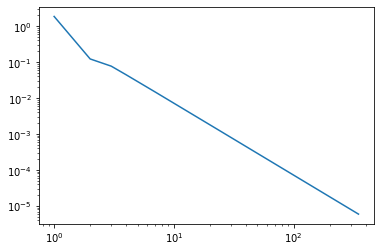

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as sp

# using a trapezoidal method 
def integral(f, a, b, n): 
    store = 0
    h = (b-a)/n
    # divide the interval into n equal parts
    x = np.linspace (a, b, n+1)
    
    for j in range(0, len(x)-1):
        store += ((f(x[j+1]) + f(x[j])) / 2) * h
    
    return(store)

def n_loop(f, a, b):
    store = []
    # n is the number of intervals 
    for n in range(1, 350):
        store.append(integral(f, a, b, n))
    return(store)
    
f = lambda x: np.exp(-x**2/2)
a = -2
b = 2

num_n = [x for x in range(1, 350)]
approx = n_loop(f, a , b)
actual = sp.quad(f, a, b)[0]
abs_errors = []

for i in range(len(approx)):
    abs_errors.append(abs(approx[i] - actual))

plt.loglog(num_n, abs_errors)

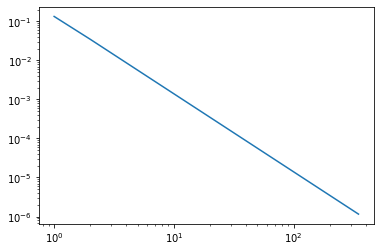

In [2]:
f = lambda x: np.cos(x**2)
a = 0
b = 1

num_n = [x for x in range(1, 350)]
approx = n_loop(f, a , b)
actual = sp.quad(f, a, b)[0]
abs_errors = []

for i in range(len(approx)):
    abs_errors.append(abs(approx[i] - actual))

plt.loglog(num_n, abs_errors)

***In both plots, we can see a negative relationship between the number of intervals and the absolute error. As we increased the number of intervals to take during the integral function (i.e. taking smaller slivers of the function at a time to integrate), the absolute error became smaller. This means that taking a larger number of intervals makes the integral more accurate. ***

## Excercise 3.104

Numerically integrate each of the functions over the interval $[-1, 2]$ with an appropriate technique and verify mathematically that your numerical integral is correct to 10 decimal places. Then provide a plot of the function along with its numerical first derivative.


* $f(x) = \frac{x}{1+x^4}$

* $g(x) = (x-1)^3 (x-2)^2$

* $h(x) = \sin\left(x^2\right)$

In [3]:
"""
It is recommended that you have a single integrate function that can take
various arguments that you can use for all of the functions. This function
should return the values of the integral over the range [a, b]. See below
for an example.

def integrate(f, a, b, steps):
    # your algorithm here
    return [] # a list of the integrated values over [a, b]

You can then define your functions using lambdas and call the integrate()
method as such: 

f = lambda x: x ** 2
a, b = -1, 2
f_int = integrate(f, a, b, 100)
...
"""

f = lambda x: x / (1 + x**4)
g = lambda x: (x - 1)**3 * (x-2)**2
m = lambda x: np.sin(x**2)
a = -1
b = 2
n = 1000000

def integral(f, a, b, n): 
    store = 0
    h = (b-a)/n
    # divide the interval into n equal parts
    x = np.linspace (a, b, n+1)
    
    for j in range(0, len(x)-1):
        store += ((f(x[j+1]) + f(x[j])) / 2) * h
    
    return(store)

print(integral(f, a, b, n))
print(sp.quad(f, a, b)[0])
print(integral(g, a, b, n))
print(sp.quad(g, a, b)[0])
print(integral(m, a, b, n))
print(sp.quad(m, a, b)[0])

0.2702097501355448
0.2702097501352914
-27.450000000116084
-27.450000000000003
1.1150447910659522
1.115044791067137


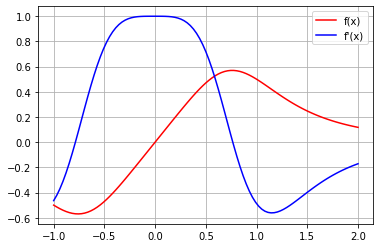

In [96]:
import numpy as np
import matplotlib.pyplot as plt

def first_deriv (f, a, b, n):
  # divide the interval into n equal parts
    x = np.linspace (a, b, n + 1)

  # the incremental value is
    h = x[1] - x[0]

  # store the derivatives
    df = []

  # use centered difference f'(x) = (f(x + h) - f(x - h)) / (2 * h)
  # set up the loop correctly
    for j in np.arange(1, len(x)-1): # evenly spaced intervals  
        df.append( (f( x[j + 1] ) - f( x[j - 1] )) / (2*h) )
    return df

f = lambda x: x / (1 + x**4)
a = -1
b = 2
 
# change this parameter to see how close you can get to the exact solution
n = 100

# get the first derivative numerically
x = np.linspace (a, b, n - 1)
df_f = first_deriv (f, a, b, n)

plt.plot (x, f(x), color = 'red', label = "f(x)")
plt.plot (x, df_f, color = 'blue', label = "f'(x)")
plt.grid()
plt.legend(["f(x)", "f'(x)"])
plt.legend()
plt.show()

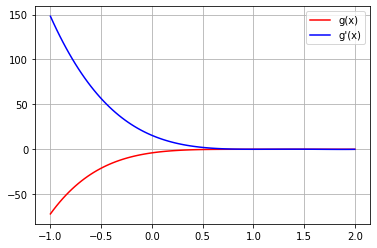

In [97]:
g = lambda x: (x - 1)**3 * (x-2)**2
a = -1
b = 2
 
# change this parameter to see how close you can get to the exact solution
n = 100

# get the first derivative numerically
x = np.linspace (a, b, n - 1)
df_g = first_deriv (g, a, b, n)

plt.plot (x, g(x), color = 'red', label = "g(x)")
plt.plot (x, df_g, color = 'blue', label = "g'(x)")
plt.grid()
plt.legend(["g(x)","g'(x)"])
plt.legend()
plt.show()

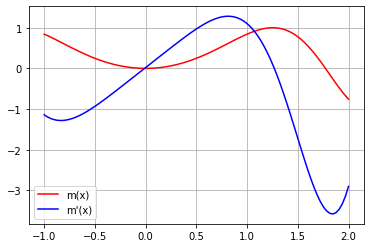

In [98]:
import numpy as np
m = lambda x: np.sin(x**2)
a = -1
b = 2
 
# change this parameter to see how close you can get to the exact solution
n = 100

# get the first derivative numerically
x = np.linspace (a, b, n - 1)
df_m = first_deriv (m, a, b, n)

plt.plot (x, m(x), color = 'red', label = "m(x)")
plt.plot (x, df_m, color = 'blue', label = "m'(x)")
plt.grid()
plt.legend(["m(x)","m'(x)"])
plt.legend()
plt.show()

## Exercise 3.105

A bicyclist completes a race course in 90 seconds. The speed of the biker at each 10-second interval is determined using a radar gun and is given in the table in feet per second. How long is the race course?

<table>
<thead>
<tr class="header">
<th>Time (sec)</th>
<th>0</th>
<th>10</th>
<th>20</th>
<th>30</th>
<th>40</th>
<th>50</th>
<th>60</th>
<th>70</th>
<th>80</th>
<th>90</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>Speed (ft/sec)</td>
<td>34</td>
<td>32</td>
<td>29</td>
<td>33</td>
<td>37</td>
<td>40</td>
<td>41</td>
<td>36</td>
<td>38</td>
<td>39</td>
</tr>
</tbody>
</table>

You can download the data with the following code.

In [99]:
import numpy as np
import pandas as pd
data = np.array( pd.read_csv("https://raw.githubusercontent.com/NumericalMethodsSullivan/NumericalMethodsSullivan.github.io/master/data/Exercise3_bikespeed.csv") ) # the data is stored here
print(data)

[[ 0 34]
 [10 32]
 [20 29]
 [30 33]
 [40 37]
 [50 40]
 [60 41]
 [70 36]
 [80 38]
 [90 39]]


In [100]:
def race_integral(data):
    h = 10
    odd = 0
    for i in range(0, len(data), 2):
        odd += data[i][1]
    even = 0
    for j in range(1, len(data)-1, 2):
        even += data[j][1]
    
    output = h/3 * (data[0][1] + 4*(odd) + 2*(even) + data[-1][1])
    return(output)

print(race_integral(data))

3570.0


***The course is 3570 feet long.***

## Exercise 3.106

For each of the following functions write code to numerically approximate the local maximum or minimum that is closest to $x = 0$. You may want to start with a plot of the function just to get a feel for where the local extreme value(s) might be.

* $\displaystyle f(x) = \frac{x}{1+x^4} + \sin(x)$

* $\displaystyle g(x) =  \left(x-1\right)^3\cdot\left(x-2\right)^2+e^{-0.5\cdot x}$

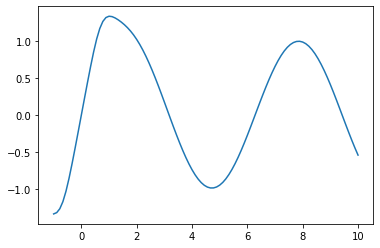

In [101]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 10, 100)
f = (x / (1+ x**4)) + np.sin(x)
plt.plot(x, f)

In [105]:
f = lambda x: x / (1+ x**4) + np.sin(x)
tol = 1e-5

def first_deriv (f, a, b, n):
  # divide the interval into n equal parts
    x = np.linspace (a, b, n + 1)

  # the incremental value is
    h = x[1] - x[0]
    
  # use centered difference f'(x) = (f(x + h) - f(x - h)) / (2 * h)
  # set up the loop correctly
    f_prime = (f(x[0] + h) - f(x[0] - h)) / (2*h)
    store_i = 0
    for i in range(len(x)):
        f_prime = (f(x[i] + h) - f(x[i] - h)) / (2*h)
        if abs(f_prime) <= tol:
            return(x[i])
        i += 1

output = first_deriv(f, 0, 2, 1000000)
print(output)

1.023086


In [106]:
g = lambda x: (x-1)**3 * (x-2)**2 + np.exp(-0.5*x)
tol = 1e-5

output = first_deriv(g, 0, 2, 1000000)
print(output)

0.746346


Replace $x$ with the proper value.
$f(x) = \textit{\textbf{YOUR ANSWER HERE}}$ 
$g(x) = \textit{\textbf{YOUR ANSWER HERE}}$ 